__1.__

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()

In [25]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(boston.data, columns=boston.feature_names) 
Y = boston.target

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

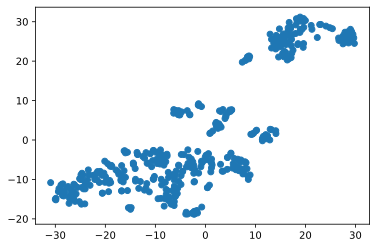

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

__2.__

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [39]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
clusters_train = model.fit_predict(X_train_scaled)

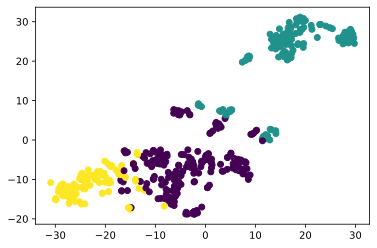

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters_train)

In [41]:
print('Price cluster 1', Y_train[clusters_train == 0].mean(),
'\nPrice cluster 2', Y_train[clusters_train == 1].mean(),
'\nPrice cluster 3', Y_train[clusters_train == 2].mean())

Price cluster 1 24.971204188481675 
Price cluster 2 16.1796875 
Price cluster 3 27.87411764705882


In [42]:
print('CRIM cluster 1', X_train['CRIM'][clusters_train == 0].mean(),
      '\nCRIM cluster 2', X_train['CRIM'][clusters_train == 1].mean(),
      '\nCRIM cluster 3:', X_train['CRIM'][clusters_train == 2].mean())

CRIM cluster 1 0.42098554973821983 
CRIM cluster 2 10.715219062500003 
CRIM cluster 3: 0.0721184705882353


__3.__

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [43]:
clusters_test = model.fit_predict(X_test_scaled)

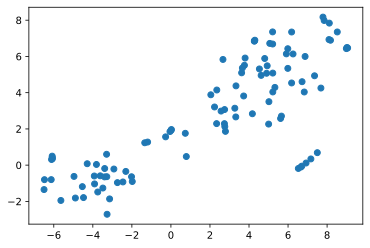

In [34]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

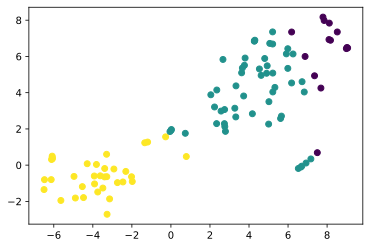

In [35]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=clusters_test)


In [37]:
print('Cluster 1', Y_test [clusters_test == 0].mean(),
'\nCluster 2', Y_test[clusters_test == 1].mean(),
'\nCluster 3', Y_test[clusters_test == 2].mean())

Cluster 1 33.871428571428574 
Cluster 2 21.552830188679245 
Cluster 3 16.43714285714286


In [38]:
print('CRIM cluster 1', X_test['CRIM'][clusters_test == 0].mean(),
      '\nCRIM cluster 2', X_test['CRIM'][clusters_test == 1].mean(),
      '\nCRIM cluster 3:', X_test['CRIM'][clusters_test == 2].mean())

CRIM cluster 1 0.08618571428571427 
CRIM cluster 2 0.25200716981132076 
CRIM cluster 3: 10.165531142857143
